<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%B2%D1%83%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%9F%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B2_%D0%9A%D0%B5%D1%80%D0%B0%D1%81_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_Kaggle%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Двумерные свёрточные нейронные сети. Регуляризация. Понятие предобученных нейронных сетей в Керас. - соревнование Kaggle

## Установка и загрузка необходимых модулей

In [ ]:
# устанавливаем свежий Kaggle API
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


###! После установки свежего API Kaggle, рекомендуем перезапустить среду выполнения. Далее, последовательно выполнять ячейки. Иначе будут ошибки в ячейках.

In [ ]:
#from tensorflow.keras.datasets import mnist, cifar10 #Библиотеки с базами Mnist, Cifar10
# Подлючаем классы создания последовательной (Sequential) и функциональной (Model) моделей 
from tensorflow.keras.models import Sequential, Model
# Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
# Conv2D - свёрточный слой, Input - для подачи входной размерности, 
# MaxPooling1D, MaxPooling2D, AveragePooling2D - пулинговые слои для уменьшения размерности
from tensorflow.keras.layers import AveragePooling2D, MaxPooling1D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
from tensorflow.keras.applications import VGG16 # предобученная нейросеть 
# импортируем слои регуляризации Dropout, BatchNormalization для борьбы с переобучением
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator # для создания аугментированных изображениями
from tensorflow.keras import utils #Утилиты для to_categorical
# from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.utils import resample #для перемешивания выборок
from sklearn.preprocessing import LabelBinarizer # для кодирования в бинарные метки по классам
from sklearn.metrics import classification_report # возвращает точность, полноту, F-меру
from sklearn.model_selection import train_test_split # функция разделения на обучающую и проверочную/тестовую выборку
#import os #для вызова прямо в среде программирования команд операционной оболочки
#import os.path # чтобы можно было добавлять цифры (переменные) в путь
#from imutils import paths # для загрузки картинок из файлов
#import glob # для получения списка имён файлов вместе с путём к ним
import zipfile # для работы с архивами zip
#import io # для работы с архивами, input - output
import numpy as np # Подключаем библиотеку numpy
# import pylab # Модуль для построения графиков
import pandas as pd # Библиотека pandas
# from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
# from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
import seaborn as sns # seaborn, надстройка визуализации над matplotlib
#from PIL import Image #Отрисовка изображений
#import cv2 # для загрузки и качественной обработки картинок
import random #Для генерации случайных выборок из датасета
import gc # для очистки памяти от лишних данных

from google.colab import drive # для подключения Google Диска
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

#Домашнее задание

##**Задание 1.** 
Загрузите из датасета по ссылке ниже базы рентгеновских снимков пневмонии - тренировочную и валидационную, а также базу для тестирования. С помощью методов, изученных в занятиях по работе с таблицами Pandas, Анализ и обработка данных, и данном занятии, обработайте датасет и подайте в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гиперпараметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Ответ можно улучшить и подавать результат несколько раз.

Ссылка на соревнование (не забудьте вначале зарегистрироваться на Каггл и войти в аккаунт, тогда ссылка приведёт на соревнование):

https://www.kaggle.com/t/29db161288094323adb3a8e10ce0d1d9

Таблица лидеров:

https://www.kaggle.com/c/university-of-digital-technologies3/leaderboard

Ссылка на датасет на Kaggle:

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

Описание: Это датасет рентгеновских снимков грудной клетки больных и здоровых людей. Рентген здоровой грудной клетки показывает чистые легкие без каких-либо участков аномального помутнения на изображении. Бактериальная пневмония обычно проявляется фокальной долевой консолидацией, тогда как вирусная пневмония проявляется более диффузным «интерстициальным» паттерном в обоих легких.

Содержание датасета:
Набор данных содержится в 3 массивах (train, test, val) и содержит метки категорий изображений (Pneumonia/Normal). Меток нет только в тестовом наборе, их нужно спрогнозировать нейронной сетью и отослать на соревнование в виде файла csv. Существует 5 863 рентгеновских снимка (JPEG) и 2 категории (Pneumonia/Normal).

Рентгеновские снимки грудной клетки (передне-задние) были отобраны из ретроспективных когорт педиатрических пациентов в возрасте от одного до пяти лет из Медицинского центра женщин и детей Гуанчжоу, Гуанчжоу. Все рентгеновские снимки грудной клетки выполнялись в рамках обычного клинического ухода за пациентами.

Для анализа рентгенограмм грудной клетки все рентгенограммы грудной клетки изначально проверялись для контроля качества путем удаления всех изображений низкого качества или нечитаемых изображений. Затем диагнозы для изображений были оценены двумя опытными врачами, прежде чем они были допущены к обучению ИИ. Чтобы учесть любые ошибки в выставлении оценок, набор оценок был также проверен третьим экспертом.

Данные: https://data.mendeley.com/datasets/rscbjbr9sj/2

Лицензия: CC BY 4.0

Ссылка для цитирования: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

##Решение

#### Создаём правильную папку для ключа Каггл

In [ ]:
!mkdir ~/.kaggle # создаём папку для ключа kaggle в Колабе, она должна быть такой по требованию Каггл

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
%cd ~/.kaggle # переходим в папку, теперь это путь по умолчанию

[Errno 2] No such file or directory: '/root/.kaggle # переходим в папку, теперь это путь по умолчанию'
/content


In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Устанавливаем ключ Каггл, чтобы участвовать в соревнованиях

Нужно зарегистрироваться на Каггл (https://www.kaggle.com/) и скачать ключ для взаимодействия с API соревновательной системы Каггла. После регистрации, справа появятся Ваши имя и фамилия - ссылка на персональную страницу. Нажмите на них. Когда страница загрузится, справа увидите Account. Нажимаете на надпись, затем прокручиваете страницу вниз, до вкладки API, там нажимаете Create New API Token. 
Ключ - это файл kaggle.json, который скачается после нажатия. Нужно скопировать его в папку Google Drive, предварительно её создав: My Drive/datasets/kaggle/ (из Колаба её адрес, который будем указывать для загрузки, такой: /content/drive/My Drive/datasets/kaggle/).

In [ ]:
# нужно зарегистрироваться на Каггл и скачать ключ для взаимодействия с API
# соревновательной системы Каггла kaggle.json. Нужно скопировать его в папку
# Google Drive, предварительно её создав: /content/drive/My Drive/datasets/kaggle/
!cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle --version

Kaggle API 1.5.12


In [ ]:
!ls

drive	     sampleSubmission.csv  train_pneumonia.npz
sample_data  test_pneumonia.npz    val_pneumonia.npz


###Скачиваем датасет, обрабатываем

In [ ]:
# скачиваем данные с Каггл
!kaggle competitions download -c university-of-digital-technologies3

 96% 218M/226M [00:01<00:00, 214MB/s]
100% 226M/226M [00:01<00:00, 213MB/s]


In [ ]:
# загрузили из архива, распаковали
z = zipfile.ZipFile('/content/university-of-digital-technologies3.zip', 'r') 
z.extractall()

In [ ]:
# удаляем архив, чтобы не занимал место на диске
!rm university-of-digital-technologies3.zip

In [ ]:
# разархивируем архив Numpy
train = np.load('train_pneumonia.npz')
test = np.load('test_pneumonia.npz')
val = np.load('val_pneumonia.npz')

In [ ]:
train.files

['X_train', 'Y_train', 'Y_train_cat']

In [ ]:
# извлекаем выборки
X_train = train['X_train']
Y_train = train['Y_train']
Y_train_cat = train['Y_train_cat']

X_val = val['X_val']
Y_val = val['Y_val']
Y_val_cat = val['Y_val_cat']

X_test = test['X_test']

In [ ]:
# нормализуем данные
X_train = X_train/255
print(X_train.shape)
X_test = X_test/255
print(X_test.shape)
X_val = X_val/255
print(X_val.shape)

(2532, 192, 192)
(1661, 192, 192)
(1663, 192, 192)


In [ ]:
# добавляем слой
X_train_c = np.expand_dims(X_train, axis = 3)
print(X_train_c.shape)
X_test_c = np.expand_dims(X_test, axis = 3)
print(X_test_c.shape)
X_val_c = np.expand_dims(X_val, axis = 3)
print(X_val_c.shape)

(2532, 192, 192, 1)
(1661, 192, 192, 1)
(1663, 192, 192, 1)


In [ ]:
print(Y_train.shape)
print(Y_val.shape)

(2532,)
(1663,)


###Создаём и обучаем нейронную сеть

In [ ]:
IMG_SIZE = 192

In [ ]:
model_2dc = Sequential() # Создаём свёрточную сеть
# Добавляем свёрточный слой на 16 нейронов (фильтра, ядра), матрица 3x3 с relu-активацией
model_2dc.add(Conv2D(16, 3, padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,1), activation="relu"))

model_2dc.add(Conv2D(16, 3, padding = 'same', activation="relu"))
#model_2dc.add(Dropout(0.2)) # слои регуляризации. отключен, т.к. ухудшает прогноз
#model_2dc.add(BatchNormalization()) # слои регуляризации 
model_2dc.add(MaxPooling2D()) # пулинг слой уменьшения размерности

model_2dc.add(Conv2D(32, 3, padding = 'same', activation="relu"))

model_2dc.add(Flatten()) # Вытягиваем данные в одномерный вектор только для классификационного слоя
model_2dc.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model_2dc.add(Dense(1, activation="sigmoid")) # Добавляем полносвязный слой на 10 нейронов с sigmoid-активацией
model_2dc.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"]) # Компилируем модель

print(model_2dc.summary()) #Вывод структуры модели


 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 192, 192, 16)      160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 192, 192, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                11796520  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
my_model_2dc = model_2dc.fit(X_train_c, Y_train, batch_size=128, epochs=40, validation_data=(X_val_c, Y_val), verbose=1)

Epoch 1/40
20/20 [==============================] - 9s 394ms/step - loss: 0.6906 - accuracy: 0.5300 - val_loss: 0.6113 - val_accuracy: 0.9080
Epoch 2/40
20/20 [==============================] - 7s 335ms/step - loss: 0.6628 - accuracy: 0.6434 - val_loss: 0.6359 - val_accuracy: 0.7835
Epoch 3/40
20/20 [==============================] - 7s 335ms/step - loss: 0.4922 - accuracy: 0.8373 - val_loss: 0.3457 - val_accuracy: 0.8713
Epoch 4/40
20/20 [==============================] - 7s 335ms/step - loss: 0.2960 - accuracy: 0.8744 - val_loss: 0.3886 - val_accuracy: 0.8256
Epoch 5/40
20/20 [==============================] - 7s 335ms/step - loss: 0.2383 - accuracy: 0.8993 - val_loss: 0.1936 - val_accuracy: 0.9164
Epoch 6/40
20/20 [==============================] - 7s 334ms/step - loss: 0.2030 - accuracy: 0.9143 - val_loss: 0.2703 - val_accuracy: 0.8755
Epoch 7/40
20/20 [==============================] - 7s 334ms/step - loss: 0.1825 - accuracy: 0.9305 - val_loss: 0.2273 - val_accuracy: 0.9116
Epoch 

###Выводим графики точности

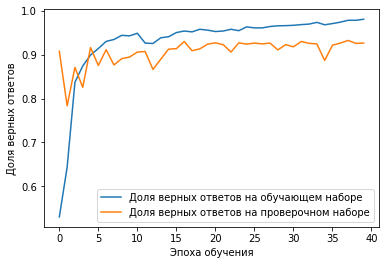

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(my_model_2dc.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(my_model_2dc.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

###Делаем предсказания моделью

In [ ]:
y_pred = model_2dc.predict(X_test_c)

In [ ]:
y_pred.shape

(1661, 1)

In [ ]:
y_pred[0]

array([0.9998567], dtype=float32)

In [ ]:
# переводим данные в формат 0 - 1
y = (y_pred > .5).astype('float32')
y = y.reshape(y.shape[0])
y

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
# убеждаемся, что есть все типы ответов
np.unique(y)

array([0., 1.], dtype=float32)

###Переводим ответ в правильный формат, отсылаем для подсчёта рейтинга

In [ ]:
# создаём датафрейм в нужном формате
submission = pd.DataFrame({"Id":range(1,len(y_pred)+1),"Label":y})
submission.head()

,Id,Label
0,1,1.0
1,2,1.0
2,3,1.0
3,4,0.0
4,5,1.0


In [ ]:
# сохраняем его как csv
submission = submission.to_csv('/content/drive/MyDrive/datasets/submission.csv', sep=',', index=False, header=True)

In [ ]:
# отправляем на соревнование
!kaggle competitions submit -c university-of-digital-technologies3 -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 562, in competition_submit_cli
    competition, quiet)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.7/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'


### Смотрим своё место в таблице лидеров:

https://www.kaggle.com/c/university-of-digital-technologies3/leaderboard

# Литература


1. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

2. https://creativecommons.org/licenses/by/4.0/

3. https://cs.stanford.edu/~acoates/stl10/

4. https://www.tensorflow.org/datasets/catalog/overview

5. https://keras.io/api/datasets/

6. https://en.wikipedia.org/wiki/Sensitivity_and_specificity

7. https://en.m.wikipedia.org/wiki/Batch_normalization#:~:text=Batch%20normalization%20(also%20known%20as,and%20Christian%20Szegedy%20in%202015.)

8. https://jmlr.org/papers/v15/srivastava14a.html

9. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

10. https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/

11. https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C

12. Автор: Max La - собственная работа, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=33394271

13. Y. LeCun, B. Boser, J. S. Denker, D. Henderson, R. E. Howard, W. Hubbard and L. D. Jackel: Backpropagation Applied to Handwritten Zip Code Recognition, Neural Computation, 1(4):541-551, Winter 1989.








# The End